In [30]:
import cv2
import imutils
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

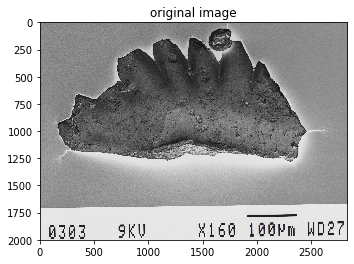

In [31]:
img = cv2.imread('F:\summer internship\dataset\conodonts\conodonts_labelled_2020-12-04\Images\yaoxianognathus\FOS5UKN6173C.jpg',cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
plt.imshow(img)
plt.title('original image')
plt.show()

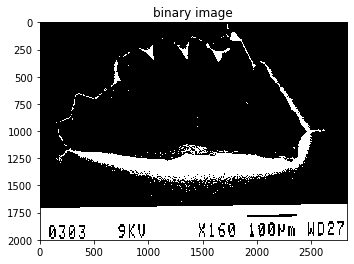

In [32]:
bw = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)[1];
plt.imshow(bw, cmap='gray')
plt.title('binary image')
plt.show()

In [33]:
contours=cv2.findContours(bw.copy(),cv2.RETR_TREE,
                                            cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours,key=cv2.contourArea, reverse = True)[:10]
screenCnt = None

In [34]:
for c in contours:
    
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.018 * peri, True)
 
    if len(approx) == 4:
        screenCnt = approx
        break

if screenCnt is None:
    detected = 0
    print ("No contour detected")
else:
     detected = 1

if detected == 1:
    cv2.drawContours(img, [screenCnt], -1, (0, 0, 255), 3)

In [35]:
mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
new_image = cv2.bitwise_and(img,img,mask=mask)

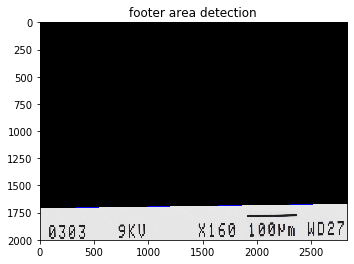

In [36]:
plt.imshow(new_image,cmap='gray')
plt.title('footer area detection')
plt.show()

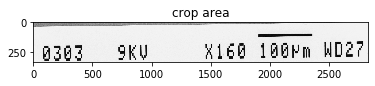

In [37]:
(x, y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
Cropped = gray[topx:bottomx+1, topy:bottomy+1]

plt.imshow(Cropped,cmap='gray')
plt.title('crop area')
plt.show()

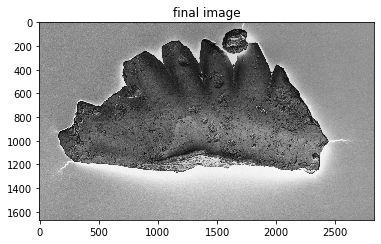

In [40]:
final = gray[0:topx, topy:bottomy+1]
plt.imshow(final,cmap='gray')
plt.title('final image')
plt.show()

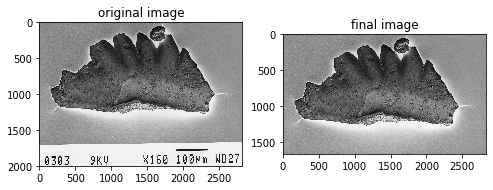

In [46]:
fig = plt.figure(figsize=(8, 8))

fig.add_subplot(1, 2, 1)
plt.title('original image')
plt.imshow(gray,cmap='gray')

fig.add_subplot(1, 2, 2)
plt.title('final image')
plt.imshow(final,cmap='gray')

plt.show()